In [35]:
import datajoint as dj
import numpy as np
from minio import Minio
import json
from utilities import *
# Connect to datajoint server
dj.conn()

DataJoint connection (connected) alex@ucsd-demo-db.datajoint.io:3306

In [36]:
# Define which schema you're using
schema = dj.schema('common_atlas')
schema.spawn_missing_classes()

# Examine Schema

In [39]:
# From utilities.py
all_stacks = list( brain_names_dic.keys() )
print( all_stacks )
print( '\n',brain_names_dic['UCSD001'] )

['MD585', 'MD589', 'MD590', 'MD591', 'MD592', 'MD593', 'MD594', 'MD595', 'MD598', 'MD599', 'MD602', 'MD603', 'CHATM2', 'CHATM3', 'CSHL2', 'MD658', 'MD661', 'MD662', 'MD635', 'MD636', 'MD639', 'MD642', 'MD652', 'MD653', 'MD657', 'MD175', 'UCSD001']

 ['NTB', 'UCSD', False, 'sagittal']


In [65]:
for stack in all_stacks:
    # rawstack_info keys: ['mouse', 'aws_bucket', 'processed_stack']
    rawstack_info = (ProcessedStack()&dict(mouse=stack)).fetch( as_dict=True )[0]
    print(rawstack_info['mouse'])
    if rawstack_info['processed_stack']=='':
        print( '  - EMPTY' )

MD585
MD589
MD590
MD591
MD592
MD593
MD594
MD595
MD598
MD599
MD602
MD603
CHATM2
  - EMPTY
CHATM3
  - EMPTY
CSHL2
  - EMPTY
MD658
MD661
MD662
MD635
MD636
  - EMPTY
MD639
  - EMPTY
MD642
MD652
MD653
MD657
MD175
  - EMPTY
UCSD001
  - EMPTY


In [61]:
rawstack_info = (ProcessedStack()&dict(mouse='MD652')).fetch( as_dict=True )[0]
print( 'List of all information that can be retrieved from a RawStack' )
print( list(rawstack_info.keys()) )
print( rawstack_info['mouse'] )
print( rawstack_info['processed_stack'] )

List of all information that can be retrieved from a RawStack
['mouse', 'aws_bucket', 'processed_stack']
MD652
CSHL_data_processed/MD652/MD652_prep2_lossless/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_lossless.tif|CSHL_data_processed/MD652/MD652_prep2_lossless/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_prep2_lossless.tif|CSHL_data_processed/MD652/MD652_prep2_lossless/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_prep2_lossless.tif|CSHL_data_processed/MD652/MD652_prep2_lossless/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_prep2_lossless.tif|CSHL_data_processed/MD652/MD652_prep2_lossless/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_prep2_lossless.tif|CSHL_data_processed/MD652/MD652_prep2_lossless/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_prep2_lossless.tif|CSHL_data_processed/MD652/MD652_prep2_lossless/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_prep2_lossless.tif|CSHL_data_processed/MD652/MD652_prep2_lossless/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_prep2_lossless.tif|CSHL_data_process

In [46]:
get_raw_files( stack, returntype="string" )

'UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S1_raw.tif|UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S2_raw.tif|UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S3_raw.tif|UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S1_raw.tif|UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S2_raw.tif|UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S3_raw.tif|UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S1_raw.tif|UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S2_raw.tif|UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S3_raw.tif|UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S4_raw.tif|UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S1_raw.tif|UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S2_raw.tif|UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S3_raw.tif|UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S4_raw.tif|UCSD_data/UCSD001/UCSD001_slide005_2018_09_03-S1_raw.tif|UCSD_data/UCSD001/UCSD001_slide005_2018_09_03-S2_raw.tif|UCSD_data/UCSD001/UCSD001_slide005_2018_09_03-S3_raw.tif|UCSD_data/UCSD001/UCSD001_slid

In [38]:
ucsd001_stack_info = (BrainStackInfo()&dict(stack='UCSD001')).fetch( as_dict=True )[0]
print( 'List of all information that can be retrieved from ' )
print( list(ucsd001_stack_info.keys()) )
ucsd001_stack_info['sorted_filenames'].split('|')

List of all information that can be retrieved from 
['mouse', 'stack_name', 'num_slices', 'num_valid_slices', 'channels', 'sorted_filenames', 'human_annotated', 'planar_resolution_um', 'section_thickness_um']


['CHATM2_slide01_2018_01_18-S1 001',
 'CHATM2_slide02_2018_01_18-S1 002',
 'CHATM2_slide01_2018_01_18-S2 003',
 'CHATM2_slide02_2018_01_18-S2 004',
 'CHATM2_slide01_2018_01_18-S3 005',
 'CHATM2_slide02_2018_01_18-S3 006',
 'CHATM2_slide03_2018_01_18-S1 007',
 'CHATM2_slide04_2018_01_18-S1 008',
 'CHATM2_slide03_2018_01_18-S2 009',
 'CHATM2_slide04_2018_01_18-S2 010',
 'CHATM2_slide03_2018_01_18-S3 011',
 'CHATM2_slide04_2018_01_18-S3 012',
 'CHATM2_slide05_2018_01_18-S1 013',
 'CHATM2_slide06_2018_01_18-S1 014',
 'CHATM2_slide05_2018_01_18-S2 015',
 'CHATM2_slide06_2018_01_18-S2 016',
 'CHATM2_slide05_2018_01_18-S3 017',
 'CHATM2_slide06_2018_01_18-S3 018',
 'CHATM2_slide07_2018_01_18-S1 019',
 'CHATM2_slide08_2018_01_18-S1 020',
 'CHATM2_slide07_2018_01_18-S2 021',
 'CHATM2_slide08_2018_01_18-S2 022',
 'CHATM2_slide07_2018_01_18-S3 023',
 'CHATM2_slide08_2018_01_18-S3 024',
 'CHATM2_slide09_2018_01_18-S1 025',
 'CHATM2_slide10_2018_01_18-S1 026',
 'CHATM2_slide09_2018_01_18-S2 027',
 

In [16]:
ucsd001_stack_info = (BrainStackInfo()&dict(mouse='UCSD001')).fetch( as_dict=True )[0]
print( ucsd001_stack_info.keys() )
ucsd001_stack_info['sorted_filenames'].split('|')

odict_keys(['mouse', 'stack_name', 'num_slices', 'num_valid_slices', 'channels', 'sorted_filenames', 'human_annotated', 'planar_resolution_um', 'section_thickness_um'])


['Placeholder 001',
 'Placeholder 002',
 'UCSD001_slide001_2018_09_03-S1 003',
 'UCSD001_slide002_2018_09_03-S1 004',
 'UCSD001_slide001_2018_09_03-S2 005',
 'UCSD001_slide002_2018_09_03-S2 006',
 'UCSD001_slide001_2018_09_03-S3 007',
 'UCSD001_slide002_2018_09_03-S3 008',
 'Placeholder 009',
 'UCSD001_slide004_2018_09_03-S1 010',
 'UCSD001_slide003_2018_09_03-S2 011',
 'UCSD001_slide004_2018_09_03-S2 012',
 'UCSD001_slide003_2018_09_03-S3 013',
 'UCSD001_slide004_2018_09_03-S3 014',
 'UCSD001_slide003_2018_09_03-S4 015',
 'UCSD001_slide004_2018_09_03-S4 016',
 'UCSD001_slide005_2018_09_03-S1 017',
 'UCSD001_slide006_2018_09_03-S1 018',
 'UCSD001_slide005_2018_09_03-S2 019',
 'UCSD001_slide006_2018_09_03-S2 020',
 'Placeholder 021',
 'UCSD001_slide006_2018_09_03-S3 022',
 'UCSD001_slide005_2018_09_03-S3 023',
 'UCSD001_slide006_2018_09_03-S4 024',
 'UCSD001_slide007_2018_09_03-S1 025',
 'UCSD001_slide008_2018_09_03-S1 026',
 'UCSD001_slide007_2018_09_03-S2 027',
 'UCSD001_slide008_2018

In [16]:
stack = 'UCSD001'

brain_stack_info_dict = (BrainStackInfo()&dict(mouse=stack)).fetch( as_dict=True )[0]
brain_stack_info_keys = list( brain_stack_info_dict.keys() )
sorted_fn_list = brain_stack_info_dict['sorted_filenames'].split('|')
print(brain_stack_info_keys)

['mouse', 'stack_name', 'num_slices', 'num_valid_slices', 'channels', 'sorted_filenames', 'human_annotated']


In [29]:
stack = 'UCSD001'

raw_stack_dict = (RawStack()&dict(mouse=stack)).fetch( as_dict=True )[0]
raw_stack_keys = list( raw_stack_dict.keys() )
print(raw_stack_keys)

['mouse', 'aws_bucket', 'raw_stack']


In [30]:
raw_stack_dict['raw_stack'].split('|')

['UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S1_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S2_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S3_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S1_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S2_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S3_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S1_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S2_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S3_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S4_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S1_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S2_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S3_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S4_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide005_2018_09_03-S1_raw.tif',
 'UCSD_data/UCSD001/UCSD001_slide005_2018_09_03-S2_raw.tif',
 'UCSD_data/UCSD001/UCSD

In [27]:
stack = 'UCSD001'

raw_stack_dict = (ProcessedStack()&dict(mouse=stack)).fetch( as_dict=True )[0]
raw_stack_keys = list( raw_stack_dict.keys() )
print(raw_stack_keys)

['mouse', 'aws_bucket', 'processed_stack']


In [ ]:
del raw_stack_dict, raw_stack_dict, brain_stack_info_dict

# Accessing S3 data

In [12]:
client = get_client()
bucket_name = 'mousebrainatlas-rawdata'
objects = client.list_objects(bucket_name, prefix='CSHL_data/MD591/')

#                  OBJECT INFO
        # bucket_name: mousebraindata-open 
        # object_name: b'MD657/MD657-F1-2017.02.17-17.39.26_MD657_1_0001.png' 
        # last_modified: 2018-08-29 04:16:33+00:00 
        # etag: 2ea51d17c3b6ad95209ec65aa59325cc 
        # size: 900864 
        # content_type: None
        # is_dir: False
        # metadata: None

for object in objects:
    if object.is_dir:
        print('Folder: ',object.object_name)
    if object.object_name.endswith('001_lossless.jp2'):
        print(object.object_name)

CSHL_data/MD591/MD591-IHC1-2015.08.28-03.23.30_MD591_1_0001_lossless.jp2
CSHL_data/MD591/MD591-N1-2015.08.28-02.35.30_MD591_3_0001_lossless.jp2


In [35]:
get_processed_files( 'MD603', resol="raw", version="mask" ).split("|")

['CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC11-2015.12.03-14.10.59_MD603_1_0033_prep2_lossless.tif',
 'CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC11-2015.12.03-14.10.59_MD603_2_0032_prep2_lossless.tif',
 'CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC11-2015.12.03-14.10.59_MD603_3_0031_prep2_lossless.tif',
 'CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC12-2015.12.03-14.14.53_MD603_1_0036_prep2_lossless.tif',
 'CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC12-2015.12.03-14.14.53_MD603_2_0035_prep2_lossless.tif',
 'CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC12-2015.12.03-14.14.53_MD603_3_0034_prep2_lossless.tif',
 'CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC13-2015.12.03-14.19.39_MD603_1_0039_prep2_lossless.tif',
 'CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC13-2015.12.03-14.19.39_MD603_2_0038_prep2_lossless.tif',
 'CSHL_data_processed/MD603/MD603_prep2_lossless/MD603-IHC13-2015.12.03-14.19.39

In [298]:
# RAW DATA RETRIEVER

client = get_client()
bucket_name='mousebrainatlas-rawdata'
objects = client.list_objects(bucket_name=bucket_name, prefix='')


folders = []
raw_data_folders = []

# Makes list of all first-level folders
for object in objects:
    if object.is_dir:
        print('Folder: ',object.object_name)
        folders.append( object.object_name )
print('')
        
# Goes through each first-level folder, generates list of 'raw_data_folders' from the many second-level folders
for folder_name in folders:
    objects = client.list_objects(bucket_name='mousebrainatlas-rawdata', prefix=folder_name)
    for object in objects:
        # If is a directory
        if object.is_dir:
            filepath = object.object_name
            subfolder_name = object.object_name[len(folder_name):-1]
            # If this subfolder is the name of a brain stack (then it contains raw data)
            if subfolder_name in brain_names_list:
                print('STACK: '+subfolder_name)
                raw_data_folders.append(filepath)
print('')
                
for raw_data_folder_name in raw_data_folders:
    objects = client.list_objects(bucket_name='mousebrainatlas-rawdata', prefix=raw_data_folder_name)
    num_slices = 0
    for object in objects:
        filename = object.object_name
        if filename.endswith('_raw.tif') or filename.endswith('_lossless.jp2'):
            num_slices += 1
            print(filename)

Folder:  CSHL_data/
Folder:  UCSD_data/

STACK: MD175
STACK: MD585
STACK: MD589
STACK: MD590
STACK: MD591
STACK: MD592
STACK: MD593
STACK: MD594
STACK: MD595
STACK: MD598
STACK: MD599
STACK: MD602
STACK: MD603
STACK: MD635
STACK: MD636
STACK: MD642
STACK: MD652
STACK: MD653
STACK: MD657
STACK: MD658
STACK: MD661
STACK: MD662
STACK: UCSD001

CSHL_data/MD585/MD585-IHC10-2015.07.16-14.55.58_MD585_1_0028_lossless.jp2
CSHL_data/MD585/MD585-IHC10-2015.07.16-14.55.58_MD585_2_0029_lossless.jp2
CSHL_data/MD585/MD585-IHC10-2015.07.16-14.55.58_MD585_3_0030_lossless.jp2
CSHL_data/MD585/MD585-IHC11-2015.07.16-14.59.21_MD585_1_0031_lossless.jp2
CSHL_data/MD585/MD585-IHC11-2015.07.16-14.59.21_MD585_2_0032_lossless.jp2
CSHL_data/MD585/MD585-IHC11-2015.07.16-14.59.21_MD585_3_0033_lossless.jp2
CSHL_data/MD585/MD585-IHC12-2015.07.16-15.02.57_MD585_1_0034_lossless.jp2
CSHL_data/MD585/MD585-IHC12-2015.07.16-15.02.57_MD585_2_0035_lossless.jp2
CSHL_data/MD585/MD585-IHC12-2015.07.16-15.02.57_MD585_3_0036_loss

CSHL_data/MD585/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_lossless.jp2
CSHL_data/MD585/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_lossless.jp2
CSHL_data/MD585/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_lossless.jp2
CSHL_data/MD585/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_lossless.jp2
CSHL_data/MD585/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_lossless.jp2
CSHL_data/MD585/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_lossless.jp2
CSHL_data/MD585/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_lossless.jp2
CSHL_data/MD585/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_lossless.jp2
CSHL_data/MD585/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_lossless.jp2
CSHL_data/MD585/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_lossless.jp2
CSHL_data/MD585/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_lossless.jp2
CSHL_data/MD585/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_lossless.jp2
CSHL_data/MD585/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_lossless.jp2
CSHL_data/MD585/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_lossl

CSHL_data/MD589/MD589-IHC1-2015.07.30-21.30.07_MD589_1_0001_lossless.jp2
CSHL_data/MD589/MD589-IHC1-2015.07.30-21.30.07_MD589_2_0002_lossless.jp2
CSHL_data/MD589/MD589-IHC1-2015.07.30-21.30.07_MD589_3_0003_lossless.jp2
CSHL_data/MD589/MD589-IHC10-2015.07.30-21.57.04_MD589_1_0028_lossless.jp2
CSHL_data/MD589/MD589-IHC10-2015.07.30-21.57.04_MD589_2_0029_lossless.jp2
CSHL_data/MD589/MD589-IHC10-2015.07.30-21.57.04_MD589_3_0030_lossless.jp2
CSHL_data/MD589/MD589-IHC11-2015.07.30-22.00.52_MD589_1_0031_lossless.jp2
CSHL_data/MD589/MD589-IHC11-2015.07.30-22.00.52_MD589_2_0032_lossless.jp2
CSHL_data/MD589/MD589-IHC11-2015.07.30-22.00.52_MD589_3_0033_lossless.jp2
CSHL_data/MD589/MD589-IHC12-2015.07.30-22.04.41_MD589_1_0034_lossless.jp2
CSHL_data/MD589/MD589-IHC12-2015.07.30-22.04.41_MD589_2_0035_lossless.jp2
CSHL_data/MD589/MD589-IHC12-2015.07.30-22.04.41_MD589_3_0036_lossless.jp2
CSHL_data/MD589/MD589-IHC13-2015.07.30-22.08.30_MD589_1_0037_lossless.jp2
CSHL_data/MD589/MD589-IHC13-2015.07.30-22

CSHL_data/MD589/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_lossless.jp2
CSHL_data/MD589/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_lossless.jp2
CSHL_data/MD589/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_lossless.jp2
CSHL_data/MD589/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_lossless.jp2
CSHL_data/MD589/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_lossless.jp2
CSHL_data/MD589/MD589-N2-2015.07.30-16.22.26_MD589_1_0004_lossless.jp2
CSHL_data/MD589/MD589-N2-2015.07.30-16.22.26_MD589_2_0005_lossless.jp2
CSHL_data/MD589/MD589-N2-2015.07.30-16.22.26_MD589_3_0006_lossless.jp2
CSHL_data/MD589/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_lossless.jp2
CSHL_data/MD589/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_lossless.jp2
CSHL_data/MD589/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_lossless.jp2
CSHL_data/MD589/MD589-N21-2015.07.30-17.23.23_MD589_1_0061_lossless.jp2
CSHL_data/MD589/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_lossless.jp2
CSHL_data/MD589/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_lossless

CSHL_data/MD590/MD590-IHC10-2015.08.10-18.06.30_MD590_1_0030_lossless.jp2
CSHL_data/MD590/MD590-IHC10-2015.08.10-18.06.30_MD590_2_0029_lossless.jp2
CSHL_data/MD590/MD590-IHC10-2015.08.10-18.06.30_MD590_3_0028_lossless.jp2
CSHL_data/MD590/MD590-IHC11-2015.08.10-18.10.08_MD590_1_0033_lossless.jp2
CSHL_data/MD590/MD590-IHC11-2015.08.10-18.10.08_MD590_2_0032_lossless.jp2
CSHL_data/MD590/MD590-IHC11-2015.08.10-18.10.08_MD590_3_0031_lossless.jp2
CSHL_data/MD590/MD590-IHC12-2015.08.10-18.14.01_MD590_1_0036_lossless.jp2
CSHL_data/MD590/MD590-IHC12-2015.08.10-18.14.01_MD590_2_0035_lossless.jp2
CSHL_data/MD590/MD590-IHC12-2015.08.10-18.14.01_MD590_3_0034_lossless.jp2
CSHL_data/MD590/MD590-IHC13-2015.08.10-18.18.03_MD590_1_0039_lossless.jp2
CSHL_data/MD590/MD590-IHC13-2015.08.10-18.18.03_MD590_2_0038_lossless.jp2
CSHL_data/MD590/MD590-IHC13-2015.08.10-18.18.03_MD590_3_0037_lossless.jp2
CSHL_data/MD590/MD590-IHC14-2015.08.10-18.22.05_MD590_1_0042_lossless.jp2
CSHL_data/MD590/MD590-IHC14-2015.08.10

CSHL_data/MD590/MD590-N26-2015.08.03-18.42.38_MD590_3_0076_lossless.jp2
CSHL_data/MD590/MD590-N27-2015.08.03-18.47.02_MD590_1_0081_lossless.jp2
CSHL_data/MD590/MD590-N27-2015.08.03-18.47.02_MD590_2_0080_lossless.jp2
CSHL_data/MD590/MD590-N27-2015.08.03-18.47.02_MD590_3_0079_lossless.jp2
CSHL_data/MD590/MD590-N28-2015.09.12-05.21.18_MD590_1_0082_lossless.jp2
CSHL_data/MD590/MD590-N28-2015.09.12-05.21.18_MD590_2_0083_lossless.jp2
CSHL_data/MD590/MD590-N28-2015.09.12-05.21.18_MD590_3_0084_lossless.jp2
CSHL_data/MD590/MD590-N29-2015.08.03-18.55.57_MD590_1_0087_lossless.jp2
CSHL_data/MD590/MD590-N29-2015.08.03-18.55.57_MD590_2_0086_lossless.jp2
CSHL_data/MD590/MD590-N29-2015.08.03-18.55.57_MD590_3_0085_lossless.jp2
CSHL_data/MD590/MD590-N3-2015.08.03-17.20.55_MD590_1_0009_lossless.jp2
CSHL_data/MD590/MD590-N3-2015.08.03-17.20.55_MD590_2_0008_lossless.jp2
CSHL_data/MD590/MD590-N3-2015.08.03-17.20.55_MD590_3_0007_lossless.jp2
CSHL_data/MD590/MD590-N30-2015.08.03-19.00.39_MD590_1_0090_lossless

CSHL_data/MD591/MD591-IHC1-2015.08.28-03.23.30_MD591_1_0001_lossless.jp2
CSHL_data/MD591/MD591-IHC1-2015.08.28-03.23.30_MD591_2_0002_lossless.jp2
CSHL_data/MD591/MD591-IHC1-2015.08.28-03.23.30_MD591_3_0003_lossless.jp2
CSHL_data/MD591/MD591-IHC10-2015.08.28-03.53.55_MD591_1_0028_lossless.jp2
CSHL_data/MD591/MD591-IHC10-2015.08.28-03.53.55_MD591_2_0029_lossless.jp2
CSHL_data/MD591/MD591-IHC10-2015.08.28-03.53.55_MD591_3_0030_lossless.jp2
CSHL_data/MD591/MD591-IHC11-2015.08.28-03.58.00_MD591_1_0031_lossless.jp2
CSHL_data/MD591/MD591-IHC11-2015.08.28-03.58.00_MD591_2_0032_lossless.jp2
CSHL_data/MD591/MD591-IHC11-2015.08.28-03.58.00_MD591_3_0033_lossless.jp2
CSHL_data/MD591/MD591-IHC12-2015.08.28-04.02.07_MD591_1_0034_lossless.jp2
CSHL_data/MD591/MD591-IHC12-2015.08.28-04.02.07_MD591_2_0035_lossless.jp2
CSHL_data/MD591/MD591-IHC12-2015.08.28-04.02.07_MD591_3_0036_lossless.jp2
CSHL_data/MD591/MD591-IHC13-2015.08.28-04.06.27_MD591_1_0037_lossless.jp2
CSHL_data/MD591/MD591-IHC13-2015.08.28-04

CSHL_data/MD591/MD591-N16-2015.08.28-04.15.00_MD591_1_0048_lossless.jp2
CSHL_data/MD591/MD591-N16-2015.08.28-04.15.00_MD591_2_0047_lossless.jp2
CSHL_data/MD591/MD591-N16-2015.08.28-04.15.00_MD591_3_0046_lossless.jp2
CSHL_data/MD591/MD591-N17-2015.08.28-04.19.17_MD591_1_0051_lossless.jp2
CSHL_data/MD591/MD591-N17-2015.08.28-04.19.17_MD591_2_0050_lossless.jp2
CSHL_data/MD591/MD591-N17-2015.08.28-04.19.17_MD591_3_0049_lossless.jp2
CSHL_data/MD591/MD591-N18-2015.08.28-04.23.35_MD591_1_0054_lossless.jp2
CSHL_data/MD591/MD591-N18-2015.08.28-04.23.35_MD591_2_0053_lossless.jp2
CSHL_data/MD591/MD591-N18-2015.08.28-04.23.35_MD591_3_0052_lossless.jp2
CSHL_data/MD591/MD591-N19-2015.08.28-04.28.05_MD591_1_0057_lossless.jp2
CSHL_data/MD591/MD591-N19-2015.08.28-04.28.05_MD591_2_0056_lossless.jp2
CSHL_data/MD591/MD591-N2-2015.08.28-02.38.01_MD591_1_0006_lossless.jp2
CSHL_data/MD591/MD591-N2-2015.08.28-02.38.01_MD591_2_0005_lossless.jp2
CSHL_data/MD591/MD591-N2-2015.08.28-02.38.01_MD591_3_0004_lossless

CSHL_data/MD592/MD592-IHC1-2015.08.25-20.18.00_MD592_1_0001_lossless.jp2
CSHL_data/MD592/MD592-IHC1-2015.08.25-20.18.00_MD592_2_0002_lossless.jp2
CSHL_data/MD592/MD592-IHC10-2015.08.25-20.50.33_MD592_1_0028_lossless.jp2
CSHL_data/MD592/MD592-IHC10-2015.08.25-20.50.33_MD592_2_0029_lossless.jp2
CSHL_data/MD592/MD592-IHC10-2015.08.25-20.50.33_MD592_3_0030_lossless.jp2
CSHL_data/MD592/MD592-IHC11-2015.08.25-20.54.42_MD592_1_0031_lossless.jp2
CSHL_data/MD592/MD592-IHC11-2015.08.25-20.54.42_MD592_2_0032_lossless.jp2
CSHL_data/MD592/MD592-IHC11-2015.08.25-20.54.42_MD592_3_0033_lossless.jp2
CSHL_data/MD592/MD592-IHC12-2015.08.25-20.58.49_MD592_1_0036_lossless.jp2
CSHL_data/MD592/MD592-IHC12-2015.08.25-20.58.49_MD592_2_0035_lossless.jp2
CSHL_data/MD592/MD592-IHC12-2015.08.25-20.58.49_MD592_3_0034_lossless.jp2
CSHL_data/MD592/MD592-IHC13-2015.08.25-21.03.03_MD592_1_0037_lossless.jp2
CSHL_data/MD592/MD592-IHC13-2015.08.25-21.03.03_MD592_2_0038_lossless.jp2
CSHL_data/MD592/MD592-IHC13-2015.08.25-2

CSHL_data/MD592/MD592-N17-2015.08.22-00.55.01_MD592_1_0049_lossless.jp2
CSHL_data/MD592/MD592-N17-2015.08.22-00.55.01_MD592_2_0050_lossless.jp2
CSHL_data/MD592/MD592-N17-2015.08.22-00.55.01_MD592_3_0051_lossless.jp2
CSHL_data/MD592/MD592-N18-2015.08.22-00.59.29_MD592_1_0052_lossless.jp2
CSHL_data/MD592/MD592-N18-2015.08.22-00.59.29_MD592_2_0053_lossless.jp2
CSHL_data/MD592/MD592-N18-2015.08.22-00.59.29_MD592_3_0054_lossless.jp2
CSHL_data/MD592/MD592-N19-2015.08.22-01.03.55_MD592_1_0055_lossless.jp2
CSHL_data/MD592/MD592-N19-2015.08.22-01.03.55_MD592_2_0056_lossless.jp2
CSHL_data/MD592/MD592-N19-2015.08.22-01.03.55_MD592_3_0057_lossless.jp2
CSHL_data/MD592/MD592-N2-2015.08.21-23.30.00_MD592_1_0004_lossless.jp2
CSHL_data/MD592/MD592-N2-2015.08.21-23.30.00_MD592_2_0005_lossless.jp2
CSHL_data/MD592/MD592-N2-2015.08.21-23.30.00_MD592_3_0006_lossless.jp2
CSHL_data/MD592/MD592-N20-2015.08.22-01.08.25_MD592_1_0058_lossless.jp2
CSHL_data/MD592/MD592-N20-2015.08.22-01.08.25_MD592_2_0059_lossless

CSHL_data/MD593/MD593-IHC10-2015.08.27-02.25.24_MD593_1_0028_lossless.jp2
CSHL_data/MD593/MD593-IHC10-2015.08.27-02.25.24_MD593_2_0029_lossless.jp2
CSHL_data/MD593/MD593-IHC10-2015.08.27-02.25.24_MD593_3_0030_lossless.jp2
CSHL_data/MD593/MD593-IHC11-2015.08.25-14.26.56_MD593_1_0031_lossless.jp2
CSHL_data/MD593/MD593-IHC11-2015.08.25-14.26.56_MD593_2_0032_lossless.jp2
CSHL_data/MD593/MD593-IHC11-2015.08.25-14.26.56_MD593_3_0033_lossless.jp2
CSHL_data/MD593/MD593-IHC12-2015.08.25-14.31.06_MD593_1_0036_lossless.jp2
CSHL_data/MD593/MD593-IHC12-2015.08.25-14.31.06_MD593_2_0035_lossless.jp2
CSHL_data/MD593/MD593-IHC12-2015.08.25-14.31.06_MD593_3_0034_lossless.jp2
CSHL_data/MD593/MD593-IHC13-2015.08.25-14.35.58_MD593_1_0039_lossless.jp2
CSHL_data/MD593/MD593-IHC13-2015.08.25-14.35.58_MD593_2_0038_lossless.jp2
CSHL_data/MD593/MD593-IHC13-2015.08.25-14.35.58_MD593_3_0037_lossless.jp2
CSHL_data/MD593/MD593-IHC14-2015.08.25-14.40.48_MD593_1_0042_lossless.jp2
CSHL_data/MD593/MD593-IHC14-2015.08.25

CSHL_data/MD593/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_lossless.jp2
CSHL_data/MD593/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_lossless.jp2
CSHL_data/MD593/MD593-N18-2015.08.21-17.28.26_MD593_2_0053_lossless.jp2
CSHL_data/MD593/MD593-N18-2015.08.21-17.28.26_MD593_3_0054_lossless.jp2
CSHL_data/MD593/MD593-N19-2015.08.21-17.32.20_MD593_1_0055_lossless.jp2
CSHL_data/MD593/MD593-N19-2015.08.21-17.32.20_MD593_2_0056_lossless.jp2
CSHL_data/MD593/MD593-N19-2015.08.21-17.32.20_MD593_3_0057_lossless.jp2
CSHL_data/MD593/MD593-N2-2015.08.21-16.10.14_MD593_1_0004_lossless.jp2
CSHL_data/MD593/MD593-N20-2015.08.21-17.37.43_MD593_1_0058_lossless.jp2
CSHL_data/MD593/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_lossless.jp2
CSHL_data/MD593/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_lossless.jp2
CSHL_data/MD593/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_lossless.jp2
CSHL_data/MD593/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_lossless.jp2
CSHL_data/MD593/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_lossle

CSHL_data/MD594/MD594-IHC1-2015.08.26-15.15.28_MD594_1_0001_lossless.jp2
CSHL_data/MD594/MD594-IHC1-2015.08.26-15.15.28_MD594_2_0002_lossless.jp2
CSHL_data/MD594/MD594-IHC1-2015.08.26-15.15.28_MD594_3_0003_lossless.jp2
CSHL_data/MD594/MD594-IHC10-2015.08.26-15.46.35_MD594_1_0028_lossless.jp2
CSHL_data/MD594/MD594-IHC10-2015.08.26-15.46.35_MD594_2_0029_lossless.jp2
CSHL_data/MD594/MD594-IHC10-2015.08.26-15.46.35_MD594_3_0030_lossless.jp2
CSHL_data/MD594/MD594-IHC11-2015.08.26-15.50.30_MD594_1_0031_lossless.jp2
CSHL_data/MD594/MD594-IHC11-2015.08.26-15.50.30_MD594_2_0032_lossless.jp2
CSHL_data/MD594/MD594-IHC11-2015.08.26-15.50.30_MD594_3_0033_lossless.jp2
CSHL_data/MD594/MD594-IHC12-2015.08.26-15.54.33_MD594_1_0034_lossless.jp2
CSHL_data/MD594/MD594-IHC12-2015.08.26-15.54.33_MD594_2_0035_lossless.jp2
CSHL_data/MD594/MD594-IHC12-2015.08.26-15.54.33_MD594_3_0036_lossless.jp2
CSHL_data/MD594/MD594-IHC13-2015.08.26-15.58.33_MD594_1_0037_lossless.jp2
CSHL_data/MD594/MD594-IHC13-2015.08.26-15

CSHL_data/MD594/MD594-N19-2015.08.26-21.55.55_MD594_2_0056_lossless.jp2
CSHL_data/MD594/MD594-N2-2015.08.26-20.52.11_MD594_1_0004_lossless.jp2
CSHL_data/MD594/MD594-N2-2015.08.26-20.52.11_MD594_2_0005_lossless.jp2
CSHL_data/MD594/MD594-N2-2015.08.26-20.52.11_MD594_3_0006_lossless.jp2
CSHL_data/MD594/MD594-N20-2015.08.26-21.59.11_MD594_1_0058_lossless.jp2
CSHL_data/MD594/MD594-N20-2015.08.26-21.59.11_MD594_2_0059_lossless.jp2
CSHL_data/MD594/MD594-N21-2015.08.26-22.02.28_MD594_1_0061_lossless.jp2
CSHL_data/MD594/MD594-N21-2015.08.26-22.02.28_MD594_2_0062_lossless.jp2
CSHL_data/MD594/MD594-N22-2015.08.26-22.05.55_MD594_1_0064_lossless.jp2
CSHL_data/MD594/MD594-N22-2015.08.26-22.05.55_MD594_2_0065_lossless.jp2
CSHL_data/MD594/MD594-N23-2015.08.26-22.09.28_MD594_1_0067_lossless.jp2
CSHL_data/MD594/MD594-N23-2015.08.26-22.09.28_MD594_2_0068_lossless.jp2
CSHL_data/MD594/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_lossless.jp2
CSHL_data/MD594/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_lossless

CSHL_data/MD595/MD595-IHC1-2015.09.15-00.46.58_MD595_1_0001_lossless.jp2
CSHL_data/MD595/MD595-IHC1-2015.09.15-00.46.58_MD595_2_0002_lossless.jp2
CSHL_data/MD595/MD595-IHC10-2015.09.15-01.13.58_MD595_1_0028_lossless.jp2
CSHL_data/MD595/MD595-IHC10-2015.09.15-01.13.58_MD595_2_0029_lossless.jp2
CSHL_data/MD595/MD595-IHC10-2015.09.15-01.13.58_MD595_3_0030_lossless.jp2
CSHL_data/MD595/MD595-IHC11-2015.09.15-01.17.51_MD595_1_0031_lossless.jp2
CSHL_data/MD595/MD595-IHC11-2015.09.15-01.17.51_MD595_2_0032_lossless.jp2
CSHL_data/MD595/MD595-IHC11-2015.09.15-01.17.51_MD595_3_0033_lossless.jp2
CSHL_data/MD595/MD595-IHC12-2015.09.15-01.21.39_MD595_1_0034_lossless.jp2
CSHL_data/MD595/MD595-IHC12-2015.09.15-01.21.39_MD595_2_0035_lossless.jp2
CSHL_data/MD595/MD595-IHC12-2015.09.15-01.21.39_MD595_3_0036_lossless.jp2
CSHL_data/MD595/MD595-IHC13-2015.09.15-01.25.33_MD595_1_0037_lossless.jp2
CSHL_data/MD595/MD595-IHC13-2015.09.15-01.25.33_MD595_2_0038_lossless.jp2
CSHL_data/MD595/MD595-IHC13-2015.09.15-0

CSHL_data/MD595/MD595-N19-2015.09.14-20.13.18_MD595_1_0055_lossless.jp2
CSHL_data/MD595/MD595-N19-2015.09.14-20.13.18_MD595_2_0056_lossless.jp2
CSHL_data/MD595/MD595-N19-2015.09.14-20.13.18_MD595_3_0057_lossless.jp2
CSHL_data/MD595/MD595-N2-2015.09.14-19.09.47_MD595_1_0004_lossless.jp2
CSHL_data/MD595/MD595-N2-2015.09.14-19.09.47_MD595_2_0005_lossless.jp2
CSHL_data/MD595/MD595-N2-2015.09.14-19.09.47_MD595_3_0006_lossless.jp2
CSHL_data/MD595/MD595-N20-2015.09.14-20.17.53_MD595_1_0058_lossless.jp2
CSHL_data/MD595/MD595-N20-2015.09.14-20.17.53_MD595_2_0059_lossless.jp2
CSHL_data/MD595/MD595-N20-2015.09.14-20.17.53_MD595_3_0060_lossless.jp2
CSHL_data/MD595/MD595-N21-2015.09.14-20.22.32_MD595_1_0061_lossless.jp2
CSHL_data/MD595/MD595-N21-2015.09.14-20.22.32_MD595_2_0062_lossless.jp2
CSHL_data/MD595/MD595-N21-2015.09.14-20.22.32_MD595_3_0063_lossless.jp2
CSHL_data/MD595/MD595-N22-2015.09.14-20.27.15_MD595_1_0064_lossless.jp2
CSHL_data/MD595/MD595-N22-2015.09.14-20.27.15_MD595_2_0065_lossless

CSHL_data/MD598/MD598-IHC10-2015.09.29-22.43.56_MD598_1_0028_lossless.jp2
CSHL_data/MD598/MD598-IHC10-2015.09.29-22.43.56_MD598_2_0029_lossless.jp2
CSHL_data/MD598/MD598-IHC10-2015.09.29-22.43.56_MD598_3_0030_lossless.jp2
CSHL_data/MD598/MD598-IHC11-2015.09.29-22.47.33_MD598_1_0031_lossless.jp2
CSHL_data/MD598/MD598-IHC11-2015.09.29-22.47.33_MD598_2_0032_lossless.jp2
CSHL_data/MD598/MD598-IHC11-2015.09.29-22.47.33_MD598_3_0033_lossless.jp2
CSHL_data/MD598/MD598-IHC12-2015.09.29-22.51.26_MD598_1_0034_lossless.jp2
CSHL_data/MD598/MD598-IHC12-2015.09.29-22.51.26_MD598_2_0035_lossless.jp2
CSHL_data/MD598/MD598-IHC12-2015.09.29-22.51.26_MD598_3_0036_lossless.jp2
CSHL_data/MD598/MD598-IHC13-2015.09.29-22.55.29_MD598_1_0037_lossless.jp2
CSHL_data/MD598/MD598-IHC13-2015.09.29-22.55.29_MD598_2_0038_lossless.jp2
CSHL_data/MD598/MD598-IHC13-2015.09.29-22.55.29_MD598_3_0039_lossless.jp2
CSHL_data/MD598/MD598-IHC14-2015.09.29-22.59.36_MD598_1_0040_lossless.jp2
CSHL_data/MD598/MD598-IHC14-2015.09.29

CSHL_data/MD598/MD598-N21-2015.09.29-17.53.01_MD598_1_0061_lossless.jp2
CSHL_data/MD598/MD598-N21-2015.09.29-17.53.01_MD598_2_0062_lossless.jp2
CSHL_data/MD598/MD598-N21-2015.09.29-17.53.01_MD598_3_0063_lossless.jp2
CSHL_data/MD598/MD598-N22-2015.09.29-17.57.39_MD598_1_0064_lossless.jp2
CSHL_data/MD598/MD598-N22-2015.09.29-17.57.39_MD598_2_0065_lossless.jp2
CSHL_data/MD598/MD598-N22-2015.09.29-17.57.39_MD598_3_0066_lossless.jp2
CSHL_data/MD598/MD598-N23-2015.09.29-18.02.11_MD598_1_0067_lossless.jp2
CSHL_data/MD598/MD598-N23-2015.09.29-18.02.11_MD598_2_0068_lossless.jp2
CSHL_data/MD598/MD598-N23-2015.09.29-18.02.11_MD598_3_0069_lossless.jp2
CSHL_data/MD598/MD598-N24-2015.09.29-18.06.44_MD598_1_0070_lossless.jp2
CSHL_data/MD598/MD598-N24-2015.09.29-18.06.44_MD598_2_0071_lossless.jp2
CSHL_data/MD598/MD598-N24-2015.09.29-18.06.44_MD598_3_0072_lossless.jp2
CSHL_data/MD598/MD598-N25-2015.09.29-18.11.17_MD598_1_0073_lossless.jp2
CSHL_data/MD598/MD598-N25-2015.09.29-18.11.17_MD598_2_0074_lossl

CSHL_data/MD599/MD599-IHC10-2015.10.03-03.33.27_MD599_1_0028_lossless.jp2
CSHL_data/MD599/MD599-IHC10-2015.10.03-03.33.27_MD599_2_0029_lossless.jp2
CSHL_data/MD599/MD599-IHC10-2015.10.03-03.33.27_MD599_3_0030_lossless.jp2
CSHL_data/MD599/MD599-IHC11-2015.10.03-03.37.28_MD599_1_0031_lossless.jp2
CSHL_data/MD599/MD599-IHC11-2015.10.03-03.37.28_MD599_2_0032_lossless.jp2
CSHL_data/MD599/MD599-IHC11-2015.10.03-03.37.28_MD599_3_0033_lossless.jp2
CSHL_data/MD599/MD599-IHC12-2015.10.03-03.41.29_MD599_1_0034_lossless.jp2
CSHL_data/MD599/MD599-IHC12-2015.10.03-03.41.29_MD599_2_0035_lossless.jp2
CSHL_data/MD599/MD599-IHC12-2015.10.03-03.41.29_MD599_3_0036_lossless.jp2
CSHL_data/MD599/MD599-IHC13-2015.10.03-03.45.54_MD599_1_0037_lossless.jp2
CSHL_data/MD599/MD599-IHC13-2015.10.03-03.45.54_MD599_2_0038_lossless.jp2
CSHL_data/MD599/MD599-IHC13-2015.10.03-03.45.54_MD599_3_0039_lossless.jp2
CSHL_data/MD599/MD599-IHC14-2015.10.03-03.50.10_MD599_1_0040_lossless.jp2
CSHL_data/MD599/MD599-IHC14-2015.10.03

CSHL_data/MD602/MD602-IHC1-2015.12.01-21.34.39_MD602_1_0001_lossless.jp2
CSHL_data/MD602/MD602-IHC1-2015.12.01-21.34.39_MD602_2_0002_lossless.jp2
CSHL_data/MD602/MD602-IHC1-2015.12.01-21.34.39_MD602_3_0003_lossless.jp2
CSHL_data/MD602/MD602-IHC10-2015.12.01-22.07.38_MD602_1_0028_lossless.jp2
CSHL_data/MD602/MD602-IHC10-2015.12.01-22.07.38_MD602_2_0029_lossless.jp2
CSHL_data/MD602/MD602-IHC10-2015.12.01-22.07.38_MD602_3_0030_lossless.jp2
CSHL_data/MD602/MD602-IHC11-2015.12.01-22.12.26_MD602_1_0031_lossless.jp2
CSHL_data/MD602/MD602-IHC11-2015.12.01-22.12.26_MD602_2_0032_lossless.jp2
CSHL_data/MD602/MD602-IHC11-2015.12.01-22.12.26_MD602_3_0033_lossless.jp2
CSHL_data/MD602/MD602-IHC12-2015.12.01-22.17.07_MD602_1_0034_lossless.jp2
CSHL_data/MD602/MD602-IHC12-2015.12.01-22.17.07_MD602_2_0035_lossless.jp2
CSHL_data/MD602/MD602-IHC12-2015.12.01-22.17.07_MD602_3_0036_lossless.jp2
CSHL_data/MD602/MD602-IHC13-2015.12.01-22.21.57_MD602_1_0037_lossless.jp2
CSHL_data/MD602/MD602-IHC13-2015.12.01-22

CSHL_data/MD602/MD602-N18-2015.12.01-16.19.08_MD602_2_0053_lossless.jp2
CSHL_data/MD602/MD602-N18-2015.12.01-16.19.08_MD602_3_0054_lossless.jp2
CSHL_data/MD602/MD602-N19-2015.12.01-16.24.09_MD602_1_0055_lossless.jp2
CSHL_data/MD602/MD602-N19-2015.12.01-16.24.09_MD602_2_0056_lossless.jp2
CSHL_data/MD602/MD602-N19-2015.12.01-16.24.09_MD602_3_0057_lossless.jp2
CSHL_data/MD602/MD602-N20-2015.12.01-16.29.14_MD602_1_0058_lossless.jp2
CSHL_data/MD602/MD602-N20-2015.12.01-16.29.14_MD602_2_0059_lossless.jp2
CSHL_data/MD602/MD602-N20-2015.12.01-16.29.14_MD602_3_0060_lossless.jp2
CSHL_data/MD602/MD602-N21-2015.12.01-16.34.19_MD602_1_0061_lossless.jp2
CSHL_data/MD602/MD602-N21-2015.12.01-16.34.19_MD602_2_0062_lossless.jp2
CSHL_data/MD602/MD602-N21-2015.12.01-16.34.19_MD602_3_0063_lossless.jp2
CSHL_data/MD602/MD602-N22-2015.12.01-16.40.03_MD602_1_0064_lossless.jp2
CSHL_data/MD602/MD602-N22-2015.12.01-16.40.03_MD602_1_0066_lossless.jp2
CSHL_data/MD602/MD602-N22-2015.12.01-16.40.03_MD602_2_0065_lossl

CSHL_data/MD603/MD603-IHC1-2015.12.03-13.22.10_MD603_1_0003_lossless.jp2
CSHL_data/MD603/MD603-IHC1-2015.12.03-13.22.10_MD603_2_0002_lossless.jp2
CSHL_data/MD603/MD603-IHC1-2015.12.03-13.22.10_MD603_3_0001_lossless.jp2
CSHL_data/MD603/MD603-IHC10-2015.12.03-14.07.04_MD603_1_0030_lossless.jp2
CSHL_data/MD603/MD603-IHC10-2015.12.03-14.07.04_MD603_2_0029_lossless.jp2
CSHL_data/MD603/MD603-IHC10-2015.12.03-14.07.04_MD603_3_0028_lossless.jp2
CSHL_data/MD603/MD603-IHC11-2015.12.03-14.10.59_MD603_1_0033_lossless.jp2
CSHL_data/MD603/MD603-IHC11-2015.12.03-14.10.59_MD603_2_0032_lossless.jp2
CSHL_data/MD603/MD603-IHC11-2015.12.03-14.10.59_MD603_3_0031_lossless.jp2
CSHL_data/MD603/MD603-IHC12-2015.12.03-14.14.53_MD603_1_0036_lossless.jp2
CSHL_data/MD603/MD603-IHC12-2015.12.03-14.14.53_MD603_2_0035_lossless.jp2
CSHL_data/MD603/MD603-IHC12-2015.12.03-14.14.53_MD603_3_0034_lossless.jp2
CSHL_data/MD603/MD603-IHC13-2015.12.03-14.19.39_MD603_1_0039_lossless.jp2
CSHL_data/MD603/MD603-IHC13-2015.12.03-14

CSHL_data/MD635/MD635-F1-2016.05.18-16.23.55_MD635_1_0001_lossless.jp2
CSHL_data/MD635/MD635-F1-2016.05.18-16.23.55_MD635_2_0002_lossless.jp2
CSHL_data/MD635/MD635-F1-2016.05.18-16.23.55_MD635_3_0003_lossless.jp2
CSHL_data/MD635/MD635-F10-2016.05.18-17.44.17_MD635_1_0028_lossless.jp2
CSHL_data/MD635/MD635-F10-2016.05.18-17.44.17_MD635_2_0029_lossless.jp2
CSHL_data/MD635/MD635-F10-2016.05.18-17.44.17_MD635_3_0030_lossless.jp2
CSHL_data/MD635/MD635-F100-2016.05.19-20.25.22_MD635_1_0298_lossless.jp2
CSHL_data/MD635/MD635-F100-2016.05.19-20.25.22_MD635_2_0299_lossless.jp2
CSHL_data/MD635/MD635-F101-2016.05.19-20.44.28_MD635_1_0301_lossless.jp2
CSHL_data/MD635/MD635-F101-2016.05.19-20.44.28_MD635_2_0302_lossless.jp2
CSHL_data/MD635/MD635-F102-2016.05.19-20.58.51_MD635_1_0304_lossless.jp2
CSHL_data/MD635/MD635-F102-2016.05.19-20.58.51_MD635_2_0305_lossless.jp2
CSHL_data/MD635/MD635-F103-2016.05.19-21.14.34_MD635_1_0307_lossless.jp2
CSHL_data/MD635/MD635-F103-2016.05.19-21.14.34_MD635_2_0308_

CSHL_data/MD635/MD635-F26-2016.05.18-21.16.59_MD635_3_0078_lossless.jp2
CSHL_data/MD635/MD635-F27-2016.05.18-21.31.38_MD635_1_0079_lossless.jp2
CSHL_data/MD635/MD635-F27-2016.05.18-21.31.38_MD635_2_0080_lossless.jp2
CSHL_data/MD635/MD635-F27-2016.05.18-21.31.38_MD635_3_0081_lossless.jp2
CSHL_data/MD635/MD635-F28-2016.05.18-21.46.26_MD635_1_0082_lossless.jp2
CSHL_data/MD635/MD635-F28-2016.05.18-21.46.26_MD635_2_0083_lossless.jp2
CSHL_data/MD635/MD635-F28-2016.05.18-21.46.26_MD635_3_0084_lossless.jp2
CSHL_data/MD635/MD635-F29-2016.05.18-22.01.14_MD635_1_0085_lossless.jp2
CSHL_data/MD635/MD635-F29-2016.05.18-22.01.14_MD635_2_0086_lossless.jp2
CSHL_data/MD635/MD635-F29-2016.05.18-22.01.14_MD635_3_0087_lossless.jp2
CSHL_data/MD635/MD635-F3-2016.05.18-16.44.09_MD635_2_0008_lossless.jp2
CSHL_data/MD635/MD635-F3-2016.05.18-16.44.09_MD635_3_0009_lossless.jp2
CSHL_data/MD635/MD635-F3-2016.05.23-13.56.45_MD635_1_0007_lossless.jp2
CSHL_data/MD635/MD635-F30-2016.05.18-22.15.39_MD635_1_0088_lossless

CSHL_data/MD636/MD636-N1-2016.05.25-17.43.10_MD636_1_0001_lossless.jp2
CSHL_data/MD636/MD636-N1-2016.05.25-17.43.10_MD636_2_0002_lossless.jp2
CSHL_data/MD636/MD636-N1-2016.05.25-17.43.10_MD636_3_0003_lossless.jp2
CSHL_data/MD636/MD636-N10-2016.05.25-18.15.57_MD636_1_0028_lossless.jp2
CSHL_data/MD636/MD636-N10-2016.05.25-18.15.57_MD636_2_0029_lossless.jp2
CSHL_data/MD636/MD636-N10-2016.05.25-18.15.57_MD636_3_0030_lossless.jp2
CSHL_data/MD636/MD636-N100-2016.05.26-01.42.09_MD636_1_0298_lossless.jp2
CSHL_data/MD636/MD636-N100-2016.05.26-01.42.09_MD636_2_0299_lossless.jp2
CSHL_data/MD636/MD636-N100-2016.05.26-01.42.09_MD636_3_0300_lossless.jp2
CSHL_data/MD636/MD636-N101-2016.05.26-01.46.47_MD636_1_0301_lossless.jp2
CSHL_data/MD636/MD636-N101-2016.05.26-01.46.47_MD636_2_0302_lossless.jp2
CSHL_data/MD636/MD636-N101-2016.05.26-01.46.47_MD636_3_0303_lossless.jp2
CSHL_data/MD636/MD636-N102-2016.05.26-01.51.23_MD636_1_0304_lossless.jp2
CSHL_data/MD636/MD636-N102-2016.05.26-01.51.23_MD636_2_0305_

CSHL_data/MD636/MD636-N46-2016.05.25-21.05.27_MD636_2_0137_lossless.jp2
CSHL_data/MD636/MD636-N46-2016.05.25-21.05.27_MD636_3_0138_lossless.jp2
CSHL_data/MD636/MD636-N47-2016.05.25-21.10.34_MD636_1_0139_lossless.jp2
CSHL_data/MD636/MD636-N47-2016.05.25-21.10.34_MD636_2_0140_lossless.jp2
CSHL_data/MD636/MD636-N47-2016.05.25-21.10.34_MD636_3_0141_lossless.jp2
CSHL_data/MD636/MD636-N48-2016.05.25-21.15.37_MD636_1_0142_lossless.jp2
CSHL_data/MD636/MD636-N48-2016.05.25-21.15.37_MD636_2_0143_lossless.jp2
CSHL_data/MD636/MD636-N48-2016.05.25-21.15.37_MD636_3_0144_lossless.jp2
CSHL_data/MD636/MD636-N49-2016.05.25-21.20.39_MD636_1_0145_lossless.jp2
CSHL_data/MD636/MD636-N49-2016.05.25-21.20.39_MD636_2_0146_lossless.jp2
CSHL_data/MD636/MD636-N49-2016.05.25-21.20.39_MD636_3_0147_lossless.jp2
CSHL_data/MD636/MD636-N5-2016.05.25-18.00.50_MD636_1_0013_lossless.jp2
CSHL_data/MD636/MD636-N5-2016.05.25-18.00.50_MD636_2_0014_lossless.jp2
CSHL_data/MD636/MD636-N5-2016.05.25-18.00.50_MD636_3_0015_lossless

CSHL_data/MD642/MD642-F1-2017.01.13-23.03.50_MD642_1_0001_lossless.jp2
CSHL_data/MD642/MD642-F1-2017.01.13-23.03.50_MD642_2_0002_lossless.jp2
CSHL_data/MD642/MD642-F1-2017.01.13-23.03.50_MD642_3_0003_lossless.jp2
CSHL_data/MD642/MD642-F10-2017.01.20-11.39.51_MD642_1_0028_lossless.jp2
CSHL_data/MD642/MD642-F10-2017.01.20-11.39.51_MD642_2_0029_lossless.jp2
CSHL_data/MD642/MD642-F10-2017.01.20-11.39.51_MD642_3_0030_lossless.jp2
CSHL_data/MD642/MD642-F11-2017.01.14-00.39.30_MD642_1_0031_lossless.jp2
CSHL_data/MD642/MD642-F11-2017.01.14-00.39.30_MD642_2_0032_lossless.jp2
CSHL_data/MD642/MD642-F11-2017.01.14-00.39.30_MD642_3_0033_lossless.jp2
CSHL_data/MD642/MD642-F12-2017.01.14-00.54.56_MD642_1_0034_lossless.jp2
CSHL_data/MD642/MD642-F12-2017.01.14-00.54.56_MD642_2_0035_lossless.jp2
CSHL_data/MD642/MD642-F12-2017.01.14-00.54.56_MD642_3_0036_lossless.jp2
CSHL_data/MD642/MD642-F13-2017.01.14-01.10.40_MD642_1_0037_lossless.jp2
CSHL_data/MD642/MD642-F13-2017.01.14-01.10.40_MD642_2_0038_lossless

CSHL_data/MD642/MD642-N18-2017.01.18-16.42.43_MD642_2_0053_lossless.jp2
CSHL_data/MD642/MD642-N18-2017.01.18-16.42.43_MD642_3_0054_lossless.jp2
CSHL_data/MD642/MD642-N19-2017.01.18-16.46.53_MD642_1_0055_lossless.jp2
CSHL_data/MD642/MD642-N19-2017.01.18-16.46.53_MD642_2_0056_lossless.jp2
CSHL_data/MD642/MD642-N19-2017.01.18-16.46.53_MD642_3_0057_lossless.jp2
CSHL_data/MD642/MD642-N2-2017.01.18-15.41.56_MD642_1_0004_lossless.jp2
CSHL_data/MD642/MD642-N2-2017.01.18-15.41.56_MD642_2_0005_lossless.jp2
CSHL_data/MD642/MD642-N2-2017.01.18-15.41.56_MD642_3_0006_lossless.jp2
CSHL_data/MD642/MD642-N20-2017.01.18-16.51.02_MD642_1_0058_lossless.jp2
CSHL_data/MD642/MD642-N20-2017.01.18-16.51.02_MD642_2_0059_lossless.jp2
CSHL_data/MD642/MD642-N20-2017.01.18-16.51.02_MD642_3_0060_lossless.jp2
CSHL_data/MD642/MD642-N21-2017.01.18-16.55.13_MD642_1_0061_lossless.jp2
CSHL_data/MD642/MD642-N21-2017.01.18-16.55.13_MD642_2_0062_lossless.jp2
CSHL_data/MD642/MD642-N21-2017.01.18-16.55.13_MD642_3_0063_lossless

CSHL_data/MD652/MD652-F1-2016.12.16-17.51.56_MD652_1_0001_lossless.jp2
CSHL_data/MD652/MD652-F1-2016.12.16-17.51.56_MD652_2_0002_lossless.jp2
CSHL_data/MD652/MD652-F1-2016.12.16-17.51.56_MD652_3_0003_lossless.jp2
CSHL_data/MD652/MD652-F10-2016.12.16-19.31.20_MD652_1_0028_lossless.jp2
CSHL_data/MD652/MD652-F10-2016.12.16-19.31.20_MD652_2_0029_lossless.jp2
CSHL_data/MD652/MD652-F10-2016.12.16-19.31.20_MD652_3_0030_lossless.jp2
CSHL_data/MD652/MD652-F11-2016.12.16-19.46.44_MD652_1_0031_lossless.jp2
CSHL_data/MD652/MD652-F11-2016.12.16-19.46.44_MD652_2_0032_lossless.jp2
CSHL_data/MD652/MD652-F11-2016.12.16-19.46.44_MD652_3_0033_lossless.jp2
CSHL_data/MD652/MD652-F12-2016.12.16-20.00.57_MD652_1_0034_lossless.jp2
CSHL_data/MD652/MD652-F12-2016.12.16-20.00.57_MD652_2_0035_lossless.jp2
CSHL_data/MD652/MD652-F12-2016.12.16-20.00.57_MD652_3_0036_lossless.jp2
CSHL_data/MD652/MD652-F13-2016.12.16-20.16.04_MD652_1_0037_lossless.jp2
CSHL_data/MD652/MD652-F13-2016.12.16-20.16.04_MD652_2_0038_lossless

CSHL_data/MD652/MD652-N12-2016.12.16-05.41.35_MD652_3_0036_lossless.jp2
CSHL_data/MD652/MD652-N13-2016.12.16-05.46.10_MD652_1_0037_lossless.jp2
CSHL_data/MD652/MD652-N13-2016.12.16-05.46.10_MD652_2_0038_lossless.jp2
CSHL_data/MD652/MD652-N13-2016.12.16-05.46.10_MD652_3_0039_lossless.jp2
CSHL_data/MD652/MD652-N14-2016.12.16-05.50.43_MD652_1_0040_lossless.jp2
CSHL_data/MD652/MD652-N14-2016.12.16-05.50.43_MD652_2_0041_lossless.jp2
CSHL_data/MD652/MD652-N14-2016.12.16-05.50.43_MD652_3_0042_lossless.jp2
CSHL_data/MD652/MD652-N15-2016.12.16-05.55.22_MD652_1_0043_lossless.jp2
CSHL_data/MD652/MD652-N15-2016.12.16-05.55.22_MD652_2_0044_lossless.jp2
CSHL_data/MD652/MD652-N15-2016.12.16-05.55.22_MD652_3_0045_lossless.jp2
CSHL_data/MD652/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless.jp2
CSHL_data/MD652/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless.jp2
CSHL_data/MD652/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless.jp2
CSHL_data/MD652/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossl

CSHL_data/MD653/MD653-F1-2016.12.20-17.47.39_MD653_1_0001_lossless.jp2
CSHL_data/MD653/MD653-F1-2016.12.20-17.47.39_MD653_2_0002_lossless.jp2
CSHL_data/MD653/MD653-F1-2016.12.20-17.47.39_MD653_3_0003_lossless.jp2
CSHL_data/MD653/MD653-F10-2016.12.20-19.51.13_MD653_1_0028_lossless.jp2
CSHL_data/MD653/MD653-F10-2016.12.20-19.51.13_MD653_2_0029_lossless.jp2
CSHL_data/MD653/MD653-F10-2016.12.20-19.51.13_MD653_3_0030_lossless.jp2
CSHL_data/MD653/MD653-F11-2016.12.20-20.05.52_MD653_1_0031_lossless.jp2
CSHL_data/MD653/MD653-F11-2016.12.20-20.05.52_MD653_2_0032_lossless.jp2
CSHL_data/MD653/MD653-F11-2016.12.20-20.05.52_MD653_3_0033_lossless.jp2
CSHL_data/MD653/MD653-F12-2016.12.20-20.20.36_MD653_1_0034_lossless.jp2
CSHL_data/MD653/MD653-F12-2016.12.20-20.20.36_MD653_2_0035_lossless.jp2
CSHL_data/MD653/MD653-F12-2016.12.20-20.20.36_MD653_3_0036_lossless.jp2
CSHL_data/MD653/MD653-F13-2016.12.20-20.35.08_MD653_1_0037_lossless.jp2
CSHL_data/MD653/MD653-F13-2016.12.20-20.35.08_MD653_2_0038_lossless

CSHL_data/MD653/MD653-N13-2016.12.17-03.29.12_MD653_1_0037_lossless.jp2
CSHL_data/MD653/MD653-N13-2016.12.17-03.29.12_MD653_2_0038_lossless.jp2
CSHL_data/MD653/MD653-N13-2016.12.17-03.29.12_MD653_3_0039_lossless.jp2
CSHL_data/MD653/MD653-N14-2016.12.17-03.33.12_MD653_1_0040_lossless.jp2
CSHL_data/MD653/MD653-N14-2016.12.17-03.33.12_MD653_2_0041_lossless.jp2
CSHL_data/MD653/MD653-N14-2016.12.17-03.33.12_MD653_3_0042_lossless.jp2
CSHL_data/MD653/MD653-N15-2016.12.17-03.37.17_MD653_1_0043_lossless.jp2
CSHL_data/MD653/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless.jp2
CSHL_data/MD653/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless.jp2
CSHL_data/MD653/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless.jp2
CSHL_data/MD653/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless.jp2
CSHL_data/MD653/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless.jp2
CSHL_data/MD653/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless.jp2
CSHL_data/MD653/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossl

CSHL_data/MD657/MD657-F1-2017.02.17-17.39.26_MD657_1_0001_lossless.jp2
CSHL_data/MD657/MD657-F1-2017.02.17-17.39.26_MD657_2_0002_lossless.jp2
CSHL_data/MD657/MD657-F1-2017.02.17-17.39.26_MD657_3_0003_lossless.jp2
CSHL_data/MD657/MD657-F10-2017.02.17-19.35.42_MD657_1_0028_lossless.jp2
CSHL_data/MD657/MD657-F10-2017.02.17-19.35.42_MD657_3_0030_lossless.jp2
CSHL_data/MD657/MD657-F10-2017.02.21-17.57.42_MD657_1_0028_lossless.jp2
CSHL_data/MD657/MD657-F10-2017.02.21-17.57.42_MD657_2_0029_lossless.jp2
CSHL_data/MD657/MD657-F10-2017.02.21-17.57.42_MD657_3_0030_lossless.jp2
CSHL_data/MD657/MD657-F11-2017.02.17-19.39.47_MD657_1_0031_lossless.jp2
CSHL_data/MD657/MD657-F11-2017.02.17-19.39.47_MD657_2_0032_lossless.jp2
CSHL_data/MD657/MD657-F11-2017.02.17-19.39.47_MD657_3_0033_lossless.jp2
CSHL_data/MD657/MD657-F12-2017.02.17-19.55.34_MD657_1_0034_lossless.jp2
CSHL_data/MD657/MD657-F12-2017.02.17-19.55.34_MD657_2_0035_lossless.jp2
CSHL_data/MD657/MD657-F12-2017.02.17-19.55.34_MD657_3_0036_lossless

CSHL_data/MD657/MD657-N13-2017.02.22-14.33.34_MD657_1_0037_lossless.jp2
CSHL_data/MD657/MD657-N13-2017.02.22-14.33.34_MD657_2_0038_lossless.jp2
CSHL_data/MD657/MD657-N13-2017.02.22-14.33.34_MD657_3_0039_lossless.jp2
CSHL_data/MD657/MD657-N14-2017.02.22-14.37.44_MD657_1_0040_lossless.jp2
CSHL_data/MD657/MD657-N14-2017.02.22-14.37.44_MD657_2_0041_lossless.jp2
CSHL_data/MD657/MD657-N14-2017.02.22-14.37.44_MD657_3_0042_lossless.jp2
CSHL_data/MD657/MD657-N15-2017.02.22-14.41.51_MD657_1_0043_lossless.jp2
CSHL_data/MD657/MD657-N15-2017.02.22-14.41.51_MD657_2_0044_lossless.jp2
CSHL_data/MD657/MD657-N15-2017.02.22-14.41.51_MD657_3_0045_lossless.jp2
CSHL_data/MD657/MD657-N16-2017.02.27-16.09.46_MD657_1_0046_lossless.jp2
CSHL_data/MD657/MD657-N16-2017.02.27-16.09.46_MD657_2_0047_lossless.jp2
CSHL_data/MD657/MD657-N16-2017.02.27-16.09.46_MD657_3_0048_lossless.jp2
CSHL_data/MD657/MD657-N17-2017.02.22-14.45.59_MD657_1_0049_lossless.jp2
CSHL_data/MD657/MD657-N17-2017.02.22-14.45.59_MD657_2_0050_lossl

CSHL_data/MD658/MD658-F1-2017.04.04-16.20.10_MD658_1_0001_lossless.jp2
CSHL_data/MD658/MD658-F1-2017.04.04-16.20.10_MD658_2_0002_lossless.jp2
CSHL_data/MD658/MD658-F1-2017.04.04-16.20.10_MD658_3_0003_lossless.jp2
CSHL_data/MD658/MD658-F10-2017.04.04-17.47.05_MD658_1_0028_lossless.jp2
CSHL_data/MD658/MD658-F10-2017.04.04-17.47.05_MD658_2_0029_lossless.jp2
CSHL_data/MD658/MD658-F10-2017.04.04-17.47.05_MD658_3_0030_lossless.jp2
CSHL_data/MD658/MD658-F11-2017.04.04-17.59.36_MD658_1_0031_lossless.jp2
CSHL_data/MD658/MD658-F11-2017.04.04-17.59.36_MD658_2_0032_lossless.jp2
CSHL_data/MD658/MD658-F11-2017.04.04-17.59.36_MD658_3_0033_lossless.jp2
CSHL_data/MD658/MD658-F12-2017.04.12-18.04.39_MD658_1_0034_lossless.jp2
CSHL_data/MD658/MD658-F12-2017.04.12-18.04.39_MD658_2_0035_lossless.jp2
CSHL_data/MD658/MD658-F12-2017.04.12-18.04.39_MD658_3_0036_lossless.jp2
CSHL_data/MD658/MD658-F13-2017.04.04-18.25.57_MD658_1_0037_lossless.jp2
CSHL_data/MD658/MD658-F13-2017.04.04-18.25.57_MD658_3_0039_lossless

CSHL_data/MD661/MD662&661-F1-2017.06.02-17.07.55_MD661_1_0001_lossless.jp2
CSHL_data/MD661/MD662&661-F1-2017.06.02-17.07.55_MD661_2_0002_lossless.jp2
CSHL_data/MD661/MD662&661-F1-2017.06.02-17.07.55_MD661_3_0003_lossless.jp2
CSHL_data/MD661/MD662&661-F10-2017.06.02-19.50.53_MD661_1_0028_lossless.jp2
CSHL_data/MD661/MD662&661-F10-2017.06.02-19.50.53_MD661_2_0029_lossless.jp2
CSHL_data/MD661/MD662&661-F10-2017.06.02-19.50.53_MD661_3_0030_lossless.jp2
CSHL_data/MD661/MD662&661-F100-2017.06.06-21.40.10_MD661_1_0298_lossless.jp2
CSHL_data/MD661/MD662&661-F100-2017.06.06-21.40.10_MD661_2_0299_lossless.jp2
CSHL_data/MD661/MD662&661-F101-2017.06.06-22.05.45_MD661_1_0301_lossless.jp2
CSHL_data/MD661/MD662&661-F101-2017.06.06-22.05.45_MD661_2_0302_lossless.jp2
CSHL_data/MD661/MD662&661-F102-2017.06.06-22.30.50_MD661_1_0304_lossless.jp2
CSHL_data/MD661/MD662&661-F102-2017.06.06-22.30.50_MD661_2_0305_lossless.jp2
CSHL_data/MD661/MD662&661-F103-2017.06.06-22.56.22_MD661_1_0307_lossless.jp2
CSHL_dat

CSHL_data/MD661/MD662&661-F32-2017.06.05-15.41.24_MD661_3_0096_lossless.jp2
CSHL_data/MD661/MD662&661-F33-2017.06.05-16.09.53_MD661_1_0097_lossless.jp2
CSHL_data/MD661/MD662&661-F33-2017.06.05-16.09.53_MD661_2_0098_lossless.jp2
CSHL_data/MD661/MD662&661-F33-2017.06.05-16.09.53_MD661_3_0099_lossless.jp2
CSHL_data/MD661/MD662&661-F34-2017.06.05-16.39.12_MD661_1_0100_lossless.jp2
CSHL_data/MD661/MD662&661-F34-2017.06.05-16.39.12_MD661_2_0101_lossless.jp2
CSHL_data/MD661/MD662&661-F34-2017.06.05-16.39.12_MD661_3_0102_lossless.jp2
CSHL_data/MD661/MD662&661-F35-2017.06.05-17.08.18_MD661_1_0103_lossless.jp2
CSHL_data/MD661/MD662&661-F35-2017.06.05-17.08.18_MD661_2_0104_lossless.jp2
CSHL_data/MD661/MD662&661-F35-2017.06.05-17.08.18_MD661_3_0105_lossless.jp2
CSHL_data/MD661/MD662&661-F36-2017.06.05-17.38.33_MD661_1_0106_lossless.jp2
CSHL_data/MD661/MD662&661-F36-2017.06.05-17.38.33_MD661_2_0107_lossless.jp2
CSHL_data/MD661/MD662&661-F36-2017.06.05-17.38.33_MD661_3_0108_lossless.jp2
CSHL_data/MD

CSHL_data/MD662/MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001_lossless.jp2
CSHL_data/MD662/MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002_lossless.jp2
CSHL_data/MD662/MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003_lossless.jp2
CSHL_data/MD662/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_lossless.jp2
CSHL_data/MD662/MD662&661-F10-2017.06.02-19.50.53_MD662_2_0029_lossless.jp2
CSHL_data/MD662/MD662&661-F10-2017.06.02-19.50.53_MD662_3_0030_lossless.jp2
CSHL_data/MD662/MD662&661-F100-2017.06.06-21.40.10_MD662_1_0298_lossless.jp2
CSHL_data/MD662/MD662&661-F100-2017.06.06-21.40.10_MD662_2_0299_lossless.jp2
CSHL_data/MD662/MD662&661-F101-2017.06.06-22.05.45_MD662_1_0301_lossless.jp2
CSHL_data/MD662/MD662&661-F101-2017.06.06-22.05.45_MD662_2_0302_lossless.jp2
CSHL_data/MD662/MD662&661-F102-2017.06.06-22.30.50_MD662_1_0304_lossless.jp2
CSHL_data/MD662/MD662&661-F102-2017.06.06-22.30.50_MD662_2_0305_lossless.jp2
CSHL_data/MD662/MD662&661-F103-2017.06.06-22.56.22_MD662_1_0307_lossless.jp2
CSHL_dat

CSHL_data/MD662/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_lossless.jp2
CSHL_data/MD662/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_lossless.jp2
CSHL_data/MD662/MD662&661-F34-2017.06.05-16.39.12_MD662_1_0100_lossless.jp2
CSHL_data/MD662/MD662&661-F34-2017.06.05-16.39.12_MD662_2_0101_lossless.jp2
CSHL_data/MD662/MD662&661-F34-2017.06.05-16.39.12_MD662_3_0102_lossless.jp2
CSHL_data/MD662/MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103_lossless.jp2
CSHL_data/MD662/MD662&661-F35-2017.06.05-17.08.18_MD662_2_0104_lossless.jp2
CSHL_data/MD662/MD662&661-F35-2017.06.05-17.08.18_MD662_3_0105_lossless.jp2
CSHL_data/MD662/MD662&661-F36-2017.06.05-17.38.33_MD662_1_0106_lossless.jp2
CSHL_data/MD662/MD662&661-F36-2017.06.05-17.38.33_MD662_2_0107_lossless.jp2
CSHL_data/MD662/MD662&661-F36-2017.06.05-17.38.33_MD662_3_0108_lossless.jp2
CSHL_data/MD662/MD662&661-F37-2017.06.05-18.09.08_MD662_1_0109_lossless.jp2
CSHL_data/MD662/MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110_lossless.jp2
CSHL_data/MD

UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S1_raw.tif
UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S2_raw.tif
UCSD_data/UCSD001/UCSD001_slide001_2018_09_03-S3_raw.tif
UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S1_raw.tif
UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S2_raw.tif
UCSD_data/UCSD001/UCSD001_slide002_2018_09_03-S3_raw.tif
UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S1_raw.tif
UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S2_raw.tif
UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S3_raw.tif
UCSD_data/UCSD001/UCSD001_slide003_2018_09_03-S4_raw.tif
UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S1_raw.tif
UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S2_raw.tif
UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S3_raw.tif
UCSD_data/UCSD001/UCSD001_slide004_2018_09_03-S4_raw.tif
UCSD_data/UCSD001/UCSD001_slide005_2018_09_03-S1_raw.tif
UCSD_data/UCSD001/UCSD001_slide005_2018_09_03-S2_raw.tif
UCSD_data/UCSD001/UCSD001_slide005_2018_09_03-S3_raw.tif
UCSD_data/UCSD001/UCSD001_slide

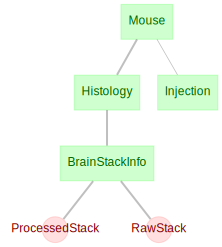

In [34]:
dj.ERD(schema)